## Assignment 7 High Frequency Words
Al Haque, Taha Ahmed

For this assignment we are taking a look at high frequency words, 
we decided to use the story of Hamlet which is located in the 
gutenberg corpus imported from nltk

In [118]:
## Import the following libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

In [79]:
## Here we load the gutenberg corpus
from nltk.corpus import gutenberg

file_ids = gutenberg.fileids()

print(file_ids)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


## Pick a corpus of Interest
In this assignment we will choose the hamlet text

In [80]:
## Let's take a look at hamlet

Hamlet = gutenberg.raw('shakespeare-hamlet.txt')


In [81]:
## First we have to tokenize the words..

words = nltk.word_tokenize(Hamlet)

## Remove any puncutation and any special characters using regular expressions..(normalization)
cleaned_words = [word.lower() for word in words if word.isalpha()]

## Next we will remove any stopwords within the cleaned_words

from nltk.corpus import stopwords

cleaned_words = [word for word in cleaned_words if word not in stopwords.words('english')]

## How many total unique words are in the corpus

In [82]:
## The set function returns all distinct items within the list..
total_unique_words = len(set(cleaned_words))

print(f'There are a total of {total_unique_words} unique words')
print(f'There are a total of {len(cleaned_words)} words')

There are a total of 4453 unique words
There are a total of 15386 words


## Most commons words and frequency distributions
Here we will try to get the most commons words from hamlet.

In [135]:
## Use a frequency dist to compute the common freq
fdist1 = FreqDist(cleaned_words)

## Sort the dictionary by it's key..so it will returned the most common word frequencies at the top

fdist2 = sorted(fdist1.items(),key = lambda x: x[1],reverse = True)

## Let's create a dataframe.. 

df = pd.DataFrame(fdist2,columns = ['word','count'])

## Let's calculate the frequency which is the count divided by the total # of words
df['rel_freq'] = df['count']/len(cleaned_words)

## Apparently fdist.most_common() returns the same thing but sorted..

df.head(10)

,word,count,rel_freq
0,ham,337,0.021903
1,lord,211,0.013714
2,haue,175,0.011374
3,king,172,0.011179
4,shall,107,0.006954
5,come,104,0.006759
6,let,104,0.006759
7,thou,104,0.006759
8,hamlet,100,0.006499
9,good,98,0.006369


Here we can see that the top ten words frequencies are ham,lord,haue,king and etc..

## Taking The most common words, how many unique words represent half of the total words in the corpus
So we take the most common words, and we add up their relative frequency and see if it reaches over half of the total word frequency..

In [84]:
## Let's take about 250 common words and their relative frequency.

top250 = pd.DataFrame(fdist1.most_common(250),columns = ['name','count'])

## Calculate their relatice frequency which is the count of each unique word divided by the total length of the text
top250['rel_freq'] = top250['count']/len(cleaned_words)

top250

,name,count,rel_freq
0,ham,337,0.021903
1,lord,211,0.013714
2,haue,175,0.011374
3,king,172,0.011179
4,shall,107,0.006954
...,...,...,...
245,barn,10,0.000650
246,marcellus,10,0.000650
247,together,10,0.000650
248,full,10,0.000650


In [85]:
## See if 250 unique words account for half of the total words in this corpus
sum(top250['rel_freq'])

0.4942155206031461

Approximately 250 words account for about 49% of the total words within the Hamlet Corpus let us add some few more unique words to get it to 50 percent.

In [86]:
## Let's take the top 300 words.

top300 = pd.DataFrame(fdist1.most_common(300),columns = ['name','count'])
top300['rel_freq'] = top300['count']/len(cleaned_words)

top300

,name,count,rel_freq
0,ham,337,0.021903
1,lord,211,0.013714
2,haue,175,0.011374
3,king,172,0.011179
4,shall,107,0.006954
...,...,...,...
295,gho,9,0.000585
296,alas,9,0.000585
297,ought,9,0.000585
298,offence,9,0.000585


In [87]:
## We can then sum up the top 300 relative frequency and see if it accounts for over 50%
sum(top300['rel_freq'])

0.5250877421032101

Thus, we can see that approximately between 250 to 300 words can account over half of the total words within the corpus

## Identify the top 200 highest frequency words within The Corpus

In [88]:
top200 = pd.DataFrame(fdist1.most_common(200),columns = ['name','count'])
top200['rel_freq'] = top300['count']/len(cleaned_words)

top200


,name,count,rel_freq
0,ham,337,0.021903
1,lord,211,0.013714
2,haue,175,0.011374
3,king,172,0.011179
4,shall,107,0.006954
...,...,...,...
195,little,13,0.000845
196,breath,13,0.000845
197,saw,13,0.000845
198,beene,13,0.000845


In [93]:
len(cleaned_words)/2

7693.0

## Create a graph that shows the relative frequency of those 200 words

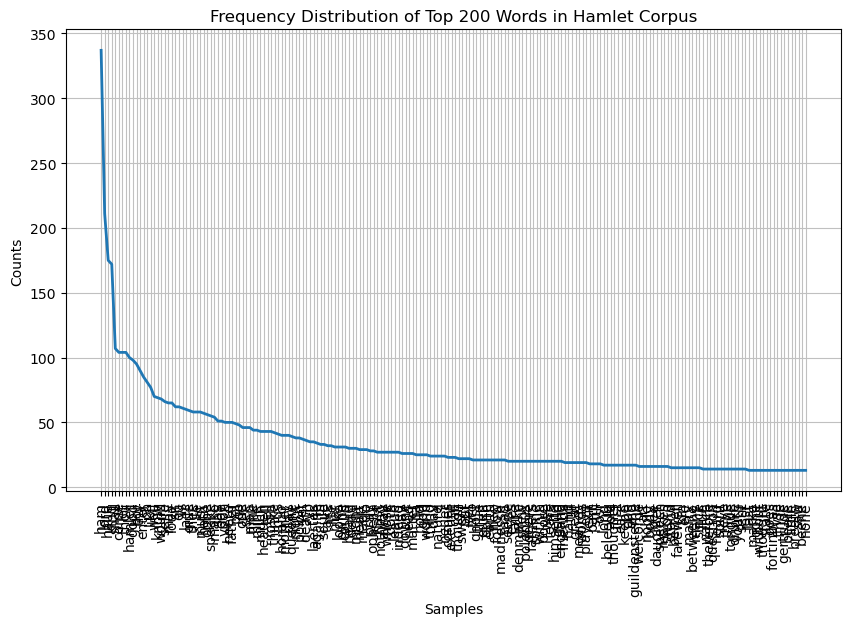

<Axes: title={'center': 'Frequency Distribution of Top 200 Words in Hamlet Corpus'}, xlabel='Samples', ylabel='Counts'>

In [103]:
plt.figure(figsize=(10, 6))
## Do this rotate 45 degrees?
plt.title('Frequency Distribution of Top 200 Words in Hamlet Corpus')
fdist1.plot(200,cumulative = False)

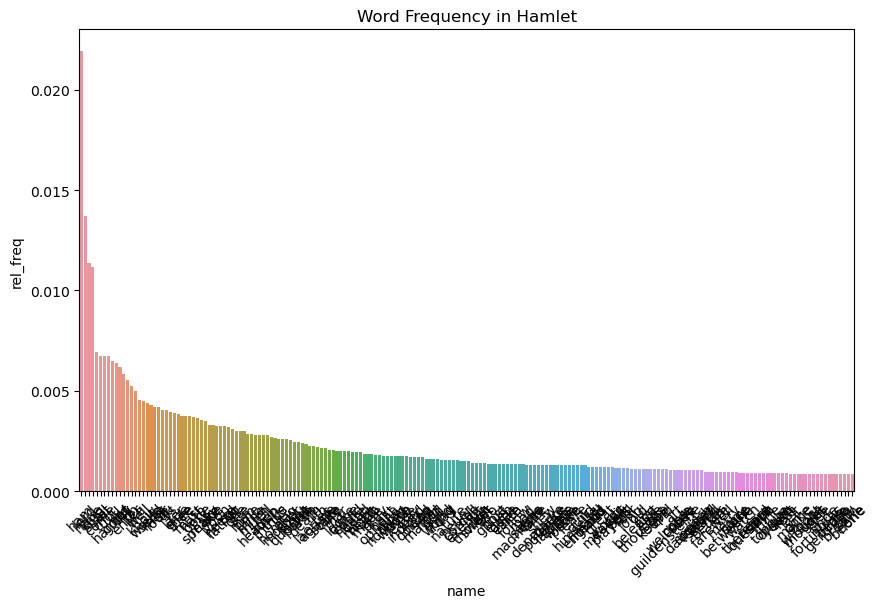

In [134]:
plt.figure(figsize=(10, 6))
plt.title('Word Frequency in Hamlet')
sns.barplot(x = top200['name'],y = top200['rel_freq'])
plt.xticks(rotation = 45)
plt.show()

## Does the observed relative frequency of these word's follow zipf's law?

Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k).


In other words, the higher the rank the word is, the lower the frequency of the word.. looking at the relative frequency plot we can see that ham has the lowest rank i.e (rank 1) and it has the highest number of frequency i.e (a count of 337), and as the rank increases for each word we see that the relative count of each unique word is decreasing. Hence the relative frequency follow zipf's law.

## In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [106]:
df['word'].unique()

array(['ham', 'lord', 'haue', ..., 'peale', 'ordenance', 'finis'],
      dtype=object)

Hamlet was written by Shakespeare in the early 1600s and as such, the words and the language style of Shakespeare's work employs a distinctive and rich form of Early modern english. As such, many of the words, sentence structure in Hamlet are no longer used today and thus the word frequency in Hamlet would be very different compared to "all words in all corpora" because of this we shouldn't be surprised that words such as "thou","shall", and "lord" appear a lot frequently because this story was written way back in the 1600s where such word use was common 